# Overview about Libraries

A jupyter notebook with a first look at...
 * markdown
 * python
 * numpy
 * pandas
 * sklearn, maybe

### first: anaconda

Anaconda, while not essential, bundles up _everything we need_ here.

https://docs.anaconda.com/anaconda

## basic python

In [1]:
x = 3.1
type(x)

float

In [2]:
y = 6

type(y)

int

In [3]:
x*y

18.6

In [4]:
x = [14,5,6,6]
type(x)

list

In [5]:
print(x[:2])

[14, 5]


In [6]:
x.append(7)
x

[14, 5, 6, 6, 7]

In [7]:
set(x)

{5, 6, 7, 14}

In [8]:
for z in x:
    print(z)
    # in python, the indentation matters!

14
5
6
6
7


In [9]:
# a dictionary (like java's Map)
mymap = {}
mymap['a'] = x
mymap['b'] = y
mymap

{'a': [14, 5, 6, 6, 7], 'b': 6}

In [10]:
for k,v in mymap.items():
    print('key: ',k, '\t val: ', v)

key:  a 	 val:  [14, 5, 6, 6, 7]
key:  b 	 val:  6


## numpy and matplotlib

numpy is mainly about arrays (vectors, matrices).

(nb. this is handy 'boilerplate' for almost any notebook)

In [11]:
%matplotlib inline 
# so can have plots rendered in this notebook

# import stuff
import matplotlib.pyplot as plt # plotting
import numpy as np # fast arrays so we can use matrices, vectors etc
import numpy.random as rng # random number generator
np.set_printoptions(precision=2) # limit precision when printing arrays

In [12]:
z=np.ones([4,3], dtype=float)
z[1, 2] = 3.1415926
z

array([[1.  , 1.  , 1.  ],
       [1.  , 1.  , 3.14],
       [1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  ]])

[[2 0 0 3 1 5]
 [4 1 6 5 1 8]
 [6 2 7 7 4 8]
 [9 6 9 8 8 8]]


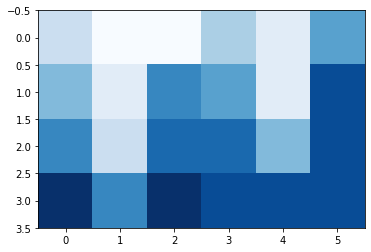

In [55]:
# create a random array of "data"
A = rng.randint(0,10, size=(4,6))
A = np.sort(A,axis=0)
print(A)
plt.imshow(A, cmap="Blues")

In [56]:
print(A)
print("shape: ", A.shape)
print(A.max(axis=0))  # or alternatively... pass r to np.max, like this:
print(np.max(A,axis=1))

[[2 0 0 3 1 5]
 [4 1 6 5 1 8]
 [6 2 7 7 4 8]
 [9 6 9 8 8 8]]
shape:  (4, 6)
[9 6 9 8 8 8]
[5 8 8 9]


In [59]:
G = rng.random((3, 2))
G.shape

(3, 2)

In [61]:
B = rng.randint(0,6,size=(4,6))
C = rng.randint(0,6,size=(6,1))
print(B,'\n\n',C)

[[0 2 2 5 5 1]
 [1 4 3 3 1 3]
 [4 1 1 3 1 4]
 [0 1 3 1 5 1]] 

 [[2]
 [2]
 [2]
 [4]
 [5]
 [1]]


In [62]:
np.dot(B, C)

array([[54],
       [36],
       [33],
       [38]])

In [63]:
B.dot(C)

array([[54],
       [36],
       [33],
       [38]])

In [64]:
B

array([[0, 2, 2, 5, 5, 1],
       [1, 4, 3, 3, 1, 3],
       [4, 1, 1, 3, 1, 4],
       [0, 1, 3, 1, 5, 1]])

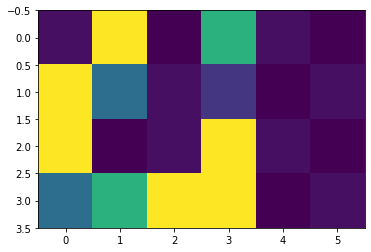

In [17]:
plt.imshow(B*B)  
# nb. elt-wise multiplication (*) is not matrix multiplication (np.dot or np.matmul)

[[2 2 2 4 5 1]]


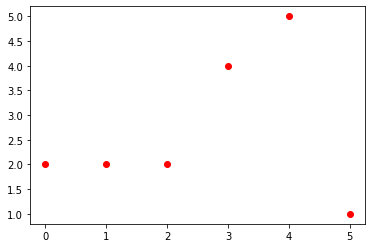

In [66]:
print(C.T)  # .T is transpose
dummy = plt.plot(C,'or')  # 'or' = red circles

## pandas

 * basic idea is a data structure called "data frame" 
 * t.b.h. I have to look up pretty much everything in pandas...  --> https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
 * can give columns of data sensible names and refer to those instead of column=7...
 * by convention, use names like "df" to indicate it's a dataframe.
 


In [19]:
import pandas as pd

In [68]:
# from the cheatsheet....
df = pd.DataFrame(
    [[4, 7, 10],
    [5, 8, 11],
    [6, 9, 12]],
    index=[1, 2, 3],
    columns=['a', 'b', 'c'])

df

,a,b,c
0,4,7,10
1,5,8,11
2,6,9,12


go grab the banknotes data, and call it "banknotes.csv", say.
We'll read it in with "pandas"

In [72]:
# Read dataset
df = pd.read_csv('banknote.csv')#, index_col=0)
df.head()

,V1,V2,V3,V4,Class
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,1
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,1


In [73]:
# Let's rename the columns..

print("original names: ", df.columns)
df.columns = ['dogs', 'cats', 'pigs', 'sheep', 'Class']
df.tail()

original names:  Index(['V1', 'V2', 'V3', 'V4', 'Class'], dtype='object')


,dogs,cats,pigs,sheep,Class
1367,0.40614,1.34920,-1.4501,-0.55949,2
1368,-1.38870,-4.87730,6.4774,0.34179,2
1369,-3.75030,-13.45860,17.5932,-2.77710,2
1370,-3.56370,-8.38270,12.3930,-1.28230,2
1371,-2.54190,-0.65804,2.6842,1.19520,2


In [24]:
df[['dogs','cats','Class']]

,dogs,cats,Class
0,3.62160,8.66610,0
1,4.54590,8.16740,0
2,3.86600,-2.63830,0
3,3.45660,9.52280,0
4,0.32924,-4.45520,0
...,...,...,...
1367,0.40614,1.34920,1
1368,-1.38870,-4.87730,1
1369,-3.75030,-13.45860,1
1370,-3.56370,-8.38270,1


In [74]:
df.describe()

,dogs,cats,pigs,sheep,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,1.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,1.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,1.000000
50%,0.496180,2.319650,0.616630,-0.586650,1.000000
75%,2.821475,6.814625,3.179250,0.394810,2.000000
max,6.824800,12.951600,17.927400,2.449500,2.000000


In [75]:
df['new'] = df.dogs * df.dogs
df

,dogs,cats,pigs,sheep,Class,new
0,3.62160,8.66610,-2.8073,-0.44699,1,13.115987
1,4.54590,8.16740,-2.4586,-1.46210,1,20.665207
2,3.86600,-2.63830,1.9242,0.10645,1,14.945956
3,3.45660,9.52280,-4.0112,-3.59440,1,11.948084
4,0.32924,-4.45520,4.5718,-0.98880,1,0.108399
...,...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,2,0.164950
1368,-1.38870,-4.87730,6.4774,0.34179,2,1.928488
1369,-3.75030,-13.45860,17.5932,-2.77710,2,14.064750
1370,-3.56370,-8.38270,12.3930,-1.28230,2,12.699958


<AxesSubplot:ylabel='Frequency'>

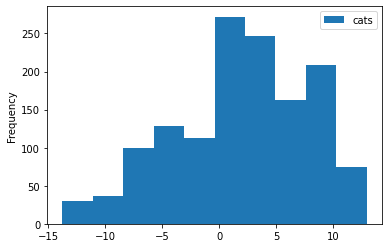

In [78]:
# dataframes can do some simple plots themselves...

df.plot.hist(y=['cats'])
#df.plot.hist(y=['cats','pigs'])
#df.plot.scatter(x='cats', y='pigs')

## seaborn is often pretty, and plays nicely with pandas

In [28]:
import seaborn as sns  # optional! Just prettier plotting

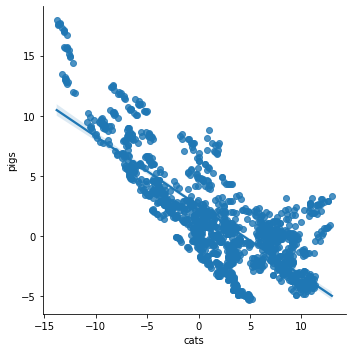

In [29]:
sns.lmplot(x='cats',y='pigs',data=df)   # nb. fits a regression line by default

(0.0, 14.287835)

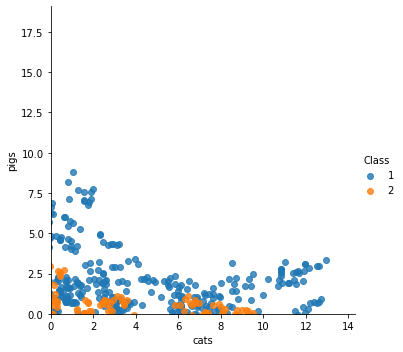

In [80]:
sns.lmplot(x='cats',y='pigs',fit_reg=False, hue='Class', data=df)

# and, optionally, tweak stuff using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

## some sklearn

"scikit-learn" is a library of machine learning tools.

First, let's just grab the iris data (sklearn has a few datasets like this)

In [81]:
from sklearn import datasets
data = datasets.load_iris()
data # this is like a dict so far, not a dataframe...

df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## further playing with sklearn
Use sklearn to make some fake date (blobs), in the form of X,Y as per lecture.

Then turn the output classes (ints) into what's called a "one-hot" encoding.

And print as colourful images...

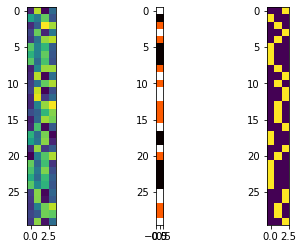

In [32]:
X, Y = datasets.make_blobs(30,4)
Y = np.atleast_2d(Y).T
fig, ax = plt.subplots(1,3)
ax[0].imshow(X)
ax[1].imshow(Y, cmap='hot')

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(Y)
ax[2].imshow(enc.transform(Y).toarray())